In [166]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import sem
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

In [167]:
# create dataset
X, y = make_classification(n_samples=1500, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# prepare the cross-validation procedure
cv_KFold = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression()

# evaluate model
scores_KFold = cross_val_score(model, X, y, scoring='accuracy', cv=cv_KFold, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_KFold), std(scores_KFold)))

Accuracy: 0.779 (0.029)


In [168]:
from sklearn.model_selection import RepeatedKFold  # use RepeatedKFold to improve the accuracy

In [169]:
# prepare the Repeated K-Fold procedure
cv_Repeate = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

# evaluate model
scores_RepeatedKFold = cross_val_score(model, X, y, scoring='accuracy', cv=cv_Repeate, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_RepeatedKFold), std(scores_RepeatedKFold)))

Accuracy: 0.780 (0.037)


### above we use repeatedKFold to improve the accuracy, but we don't know how to choose the values of n_repeats. We need to find the relationship between n_ repeats and the accuracy of the model to determine the relationship between them

In [170]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
 # prepare the cross-validation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

>1 mean=0.7787 se=0.010
>2 mean=0.7790 se=0.007
>3 mean=0.7796 se=0.005
>4 mean=0.7802 se=0.005
>5 mean=0.7811 se=0.005
>6 mean=0.7803 se=0.005
>7 mean=0.7807 se=0.004
>8 mean=0.7810 se=0.004
>9 mean=0.7808 se=0.004
>10 mean=0.7805 se=0.004
>11 mean=0.7806 se=0.003
>12 mean=0.7807 se=0.003
>13 mean=0.7804 se=0.003
>14 mean=0.7804 se=0.003


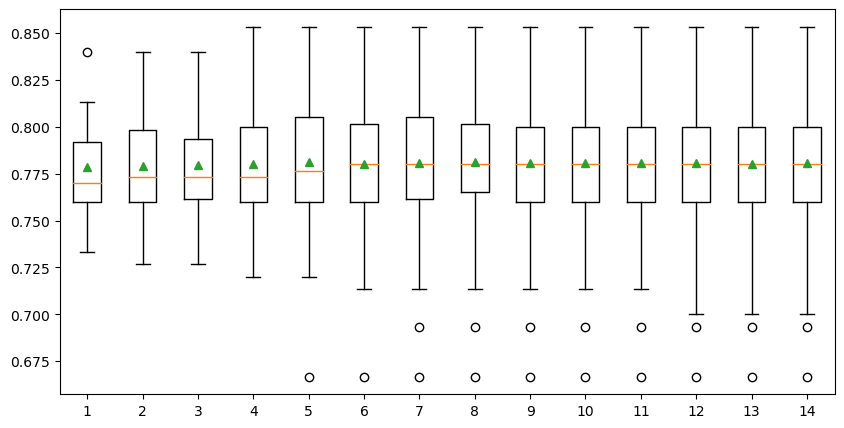

In [171]:
# configurations to test
repeats = range(1,15)
results = list()

for r in repeats:
 # evaluate using a given number of repeats
 scores = evaluate_model(X, y, r)
 # summarize
 print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
 # store
 results.append(scores)
# plot the results
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

## According to mean, se and graph, ' n_repeats = 6 ' seems to be a good choice.